In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Read data to the python environment

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Preprocessing

In [ ]:
#checking for null values

In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
#handling missing values

In [5]:
for col in ['SL','SW','PL','PW']:
    data[col]=data[col].fillna(data[col].median())
    

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#summary statistics

In [7]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape # shape of the data

(150, 5)

In [9]:
data.head(1)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa


In [ ]:
#checking for unique values

In [10]:
data["Classification"].nunique()

3

In [11]:
data["Classification"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

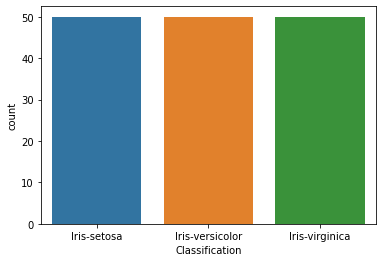

In [12]:
sns.countplot(x=data["Classification"])
plt.show()

In [ ]:
#perform label encoding in classification column

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder=LabelEncoder()
data["Classification"]=label_encoder.fit_transform(data["Classification"])

In [15]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
data["Classification"].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [ ]:
#to check the precentage of counts

In [17]:
data["Classification"].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

In [ ]:
#correlation matrix

<AxesSubplot:>

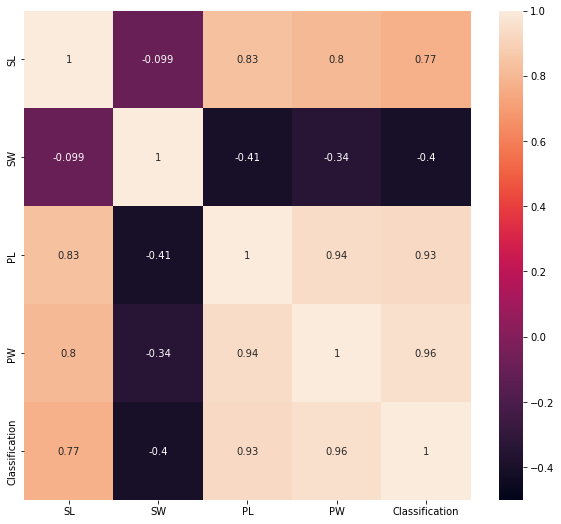

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corrmatrix,vmin=-0.5,vmax=1,annot=True)

In [ ]:
#splitting data into features and target

In [19]:
y=data["Classification"]
X=data.drop("Classification",axis=1)

In [ ]:
#train - test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


LogisticRegression Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
y_pred_logit

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test,y_pred_logit)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred_logit)*100

97.36842105263158

KNearestNeighbor Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
metric_k=[]


In [31]:
neighbors=range(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_KNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

In [32]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

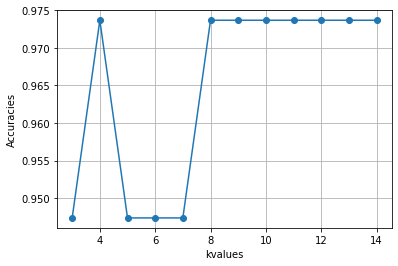

In [33]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('kvalues')
plt.ylabel('Accuracies')
plt.grid()

In [34]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier=classifier.fit(X_train,y_train)
y_pred_KNN=classifier.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred_KNN)

0.9473684210526315

In [36]:
confusion_matrix(y_test,y_pred_KNN)

array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

SVM Model

In [37]:
from sklearn.svm import SVC

In [38]:
svm_clf=SVC(kernel='rbf')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred_svm)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred_svm)

0.9736842105263158

Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [43]:
y_pred_dt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [44]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred_dt)

1.0

Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [48]:
y_pred_rf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [49]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred_rf)

1.0

In [ ]:
"""
For the given dataset when logistic regression is applied ,the accuracy obtained is 97%,
similarly when KNearestNeighbor model is applied the accuracy score obtained is about 94%
and when Decision Tree and Random Forest models applied the accuracies obtained were 100%
from the obtained accuracies its clear that both Decision tree and Random forest models gives the best result.
"""